In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import networkx as nx
import pickle

import sys
sys.path.insert(1, '../')
from utils import *

In [2]:
plt.rcParams.update({'font.size': 15})

## Functions:

In [3]:
def load_C_mean(filename):
    with open(filename, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            C = np.array([float(i) for i in row])
    return C

In [4]:
# cosine similarity between vectors
def similarity(v1,v2):
    
    return np.sum(v1*v2) / (np.sqrt((np.sum(v1*v1))*np.sum(v2*v2)))

In [5]:
#dataset = 'hospital'
#dataset = 'high_school'
#dataset = 'conference'
dataset = 'workplace'
#dataset = 'pr_school'

In [6]:
weighted = True

In [7]:
edgelist_name = '../data/pairwise/' + dataset + '_strength_edgelist_pairwise_sorted_norm.pkl'
with open(edgelist_name, 'rb') as f:
    edgelist = pickle.load(f)

nodes_list = np.unique(list(edgelist.keys()))

In [8]:
nb_nodes = len(nodes_list)
#seed_size = int(round(nb_nodes/10))
seed_size = 1

# Comparison matrices

In [9]:
mu = 0.1

Load all simple results

In [10]:
mu = 0.1
betaT = 0
if dataset == 'hospital':
    beta_range = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    R0_range = [1.20,1.53,1.77,2,2.22,2.38,2.56,2.7]

elif dataset == 'high_school':
    beta_range = [0.5,0.6,0.7,0.8,0.9,1.0]
    R0_range = [1.25,1.40,1.55,1.71,1.83,1.88]

elif dataset == 'workplace':
    beta_range = [0.3,0.4,0.5,0.6,0.7,0.8]
    R0_range = [1.26,1.55,1.82,2.06,2.22,2.40]

elif dataset == 'conference':
    beta_range = [0.6,0.7,0.8,0.9,1]
    R0_range = [1.21,1.37,1.49,1.60,1.74]
    
elif dataset == 'pr_school':
    beta_range = [0.12,0.15,0.18,0.21,0.24,0.27,0.3,0.33,0.36]
    R0_range = [1.40,1.65,1.97,2.11,2.31,2.48,2.68,2.84,3.01]


In [12]:
C_list_simple = []
for beta in beta_range:
    filename = "../Simple_model/code/results/inf_treeSIR/CL_mean_weighted_%s_beta_%.3f_betaT_0.000_mu_%.2f_init_%d.csv"%(dataset,beta,mu,seed_size)
    C = load_C_mean(filename)
    C_list_simple.append(C)

In [13]:
len(C_list_simple)

6

Load all threshold results

In [14]:
thresholds = [0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22]
if dataset == 'pr_school':
    thresholds = [0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16]

mu = 0.1

In [15]:
C_list_thresh = []
for theta in thresholds:
    filename = "../Threshold_model/code/results/inf_treeSIR/C_mean_weighted_%s_th_%.2f_mu_%.3f.csv"%(dataset,theta,mu)
    C = load_C_mean(filename)
    C_list_thresh.append(C)

In [16]:
len(C_list_thresh)

10

Compute similarity and put in matrix sim$\\$ (each row is a different $\theta$, each column a different $\beta_|$)

In [17]:
sim = np.full((len(thresholds),len(beta_range)),0.0)
for i in range(len(thresholds)):
    for j in range(len(beta_range)): 
        #print('riga',i,'theta',thresholds[i],'colonna',j,'R0',R0_range[j])
        sim[i,j] = similarity(C_list_thresh[i],C_list_simple[j])

In [18]:
len(sim), len(sim[0])

(10, 6)

In [19]:
def plot_sim_different_axes(sim,x_range,y_range,x_label,y_label,minValue_dataset,maxValue_dataset,save,scale):
    fig,ax = plt.subplots(1,1,figsize=(4.5,4))
    if scale == 'independent':
        minValue = min([min(sim[n][np.nonzero(sim[n])]) for n in range(len(sim)-1)])
        maxValue = max([max(sim[n]) for n in range(len(sim))])
    elif scale == 'fixed':
        minValue = minValue_dataset
        maxValue = maxValue_dataset
    print(minValue,maxValue)
    sns.heatmap(sim,
                xticklabels=x_range,
                yticklabels=y_range,
                annot=False,
                vmin=minValue,
                vmax=maxValue,
                cmap="viridis")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    if save:        
        if scale == 'independent':
            figname = 'figs/sim_threshold_simple_%s_mu_%.3f.pdf'%(dataset,mu)
        elif scale == 'fixed':
            figname = 'figs/sim_threshold_simple_%s_mu_%.3f_colorscale.pdf'%(dataset,mu)
        print(figname)
        plt.savefig(figname)
    plt.show()

In [24]:
if dataset == 'pr_school':
    minValue_dataset = 0.6906763827664567
    maxValue_dataset = 0.9712661863066689
elif dataset == 'hospital':
    minValue_dataset = 0.5859676185492886
    maxValue_dataset = 0.9725345554627652
elif dataset == 'workplace':
    minValue_dataset = 0.6640920326980589
    maxValue_dataset = 0.9812107449339817
elif dataset == 'high_school':
    minValue_dataset = 0.4273770824044987 
    maxValue_dataset = 0.940444458075442
elif dataset == 'conference':
    minValue_dataset = 0.41928424527832536 
    maxValue_dataset = 0.9706776648953375

0.6640920326980589 0.7879139201180526
figs/sim_threshold_simple_workplace_mu_0.100.pdf


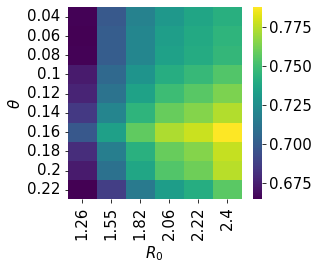

In [21]:
plot_sim_different_axes(sim, 
                        R0_range, 
                        thresholds, 
                        '$R_0$', 
                        r'$\theta$',
                        minValue_dataset,
                        maxValue_dataset,
                        save=True,
                        scale='independent')

0.6640920326980589 0.9812107449339817
figs/sim_threshold_simple_workplace_mu_0.100_colorscale.pdf


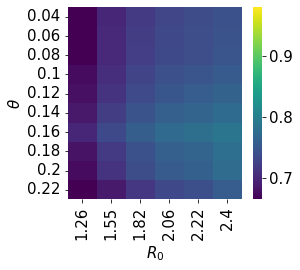

In [25]:
plot_sim_different_axes(sim, 
                        R0_range, 
                        thresholds, 
                        '$R_0$', 
                        r'$\theta$',
                        minValue_dataset,
                        maxValue_dataset,
                        save=True,
                        scale='fixed')

In [23]:
similarity(C_list_thresh[0],C_list_simple[8])

IndexError: list index out of range

In [ ]:
similarity(C_list_thresh[7],C_list_simple[8])

In [ ]:
beta = 0.12
filename = "../Simplicial_model/code/results/inf_treeSIR/CL_mean_weighted_%s_beta_%.3f_betaT_0.000_mu_%.2f_init_%d.csv"%(dataset,beta,mu,seed_size)
S1 = load_C_mean(filename)

In [ ]:
beta = 0.36
filename = "../Simplicial_model/code/results/inf_treeSIR/CL_mean_weighted_%s_beta_%.3f_betaT_0.000_mu_%.2f_init_%d.csv"%(dataset,beta,mu,seed_size)
S2 = load_C_mean(filename)

In [ ]:
theta = 0.02
filename = "../Threshold_model/code/results/inf_treeSIR/C_mean_weighted_%s_th_%.2f_mu_%.3f.csv"%(dataset,theta,mu)
T1 = load_C_mean(filename)

In [ ]:
theta = 0.16
filename = "../Threshold_model/code/results/inf_treeSIR/C_mean_weighted_%s_th_%.2f_mu_%.3f.csv"%(dataset,theta,mu)
T2 = load_C_mean(filename)

In [ ]:
similarity(S2,T1)

In [ ]:
similarity(S2,T2)